# 교차 검증

ML모델이 데이터를 학습할 때 `과적합(Overfitting)` 문제를 피하기 위해 원본 데이터를 분리하여 Training data set과 Test data set으로 분리한다고 설명했습니다.

하지만 이 방법 역시 과적합에 취약할 수 있습니다.

## 과적합(Overfitting)이란?

`과적합이란 ML모델이 학습데이터에 과도하게 최적화(fit)되어, 학습된 데이터에는 좋은 성능을 보이지만 새로운 데이터로 예측할 때 예측성능이 과도하게 떨어지는 현상을 말합니다.`

## 고정된 학습데이터와 테스트 데이터 사용의 문제점

따라서 과적합을 피하기 위해 원본 데이터를 학습 데이터, 테스트 데이터로 분리하여 모델을 학습하고 성능을 평가하게 됩니다.

하지만 이 경우 역시 고정된 학습 데이터, 테스트 데이터로 평가를 하다 보면 `테스트 데이터에만 최적의 성능`을 발휘하는 `편향된 모델`을 유도하는 경향이 생길 수 있습니다.

이 경우에는 `또 다른 새로운 테스트 데이터에 있어서 과도하게 성능이 낮아지는 문제`가 발생할 수 있습니다. 

이러한 문제점을 개선하기 위해 **`교차 검증`**을 이용해 다양한 학습과 평가를 수행합니다.

## 교차검증이란?

교차 검증이란 쉽게 생각하면 본고사를 치르기 전 모의고사를 여러 번 보는 것입니다.

`본고사는 테스트 데이터 세트에 대한 마지막 평가`로 이해할 수 있고 `모의고사는 교차 검증에서 많은 학습과 검증 세트에서 알고리즘 학습과 평가를 수행`하는 것입니다.

ML은 데이터를 기반해서 학습됩니다. 그리고 그 데이터는 ML에 미치는 다양한 요소를 가지고 있습니다. 

따라서 특정 ML 알고리즘에서만 최적의 성능을 보이도록 데이터를 선별해 학습한다면 결국 실제 데이터 양식과 큰 차이가 있을 것이고 이는 성능 저하로 이어집니다.

정리하면 **`교차검증`**은 데이터 편중을 막기 위해 별도의 `여러 세트로 구성된 학습 데이터 세트`와 `검증 데이터 세트`에서 학습과 평가를 수행하는 것입니다.

그리고 각 세트에서 `수행한 결과에 따라 하이퍼 파라미터 튜닝 등의 모델 최적화를 더욱 손쉽게` 할 수 있습니다.

**`대부분의 ML 모델 성능 평가는 교차 검증 기반 1차 평가 후 최종 테스트 데이터 세트에 적용해 평가하는 프로세스를 가집니다.`**

ML에 사용되는 데이터 세트를 세분화하면 다음과 같습니다.

**`1. 학습`**

**`2. 검증`**

**`3. 테스트`**

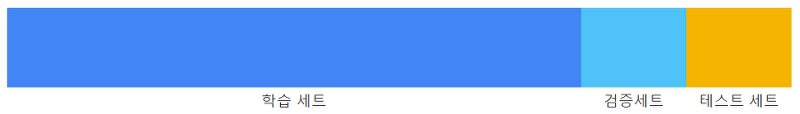

# K 폴드 교차 검증

`K 폴드 교차검증은` 가장 보편적으로 사용되는 교차 검증 기법입니다.

먼저 K개의 데이터 폴드 세트를 만들어서 `K번만큼 각 폴드 세트에 학습과 검증을 반복`적으로 수행해는 방법입니다.

아래의 그림은 5 폴드 교차 검증을 수행합니다.**(K=5)**

5개의 폴드된 데이터 세트를 학습과 검증을 위한 데이터 세트로 변경하면서 5번 평가를 수행한 뒤, `이 5개의 평가를 평균한 결과`를 가지고 예측 성능을 평가합니다.

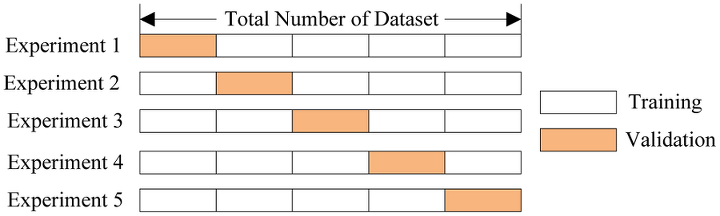

먼저 데이터 세트를 `K등분`(5)합니다. 그리고 `Experiment 1`에서는 `2번부터 5번까지의 등분을 학습 데이터 세트, 1번 등분을 검증 데이터 세트로 설정하고 학습 데이터에서 학습, 검증 데이터에서 평가를 수행합니다.`

Experiment1이 끝나면 Experiment2로 넘어가 같은 작업을 반복합니다. 

이렇게 각 Experiment(학습/검증)에 대해 학습 데이터 세트와 검증 데이터 세트를 점진적을 변경하면서 마지막 K번째 까지 학습과 검증을 수행하는 것이 K 폴드 교차 검증입니다.

이렇게 구해진 `5개의 예측 평가를 구하면 이 값을 평균해서 K 폴드 평가 결과로 반영`합니다.

사이킷런은 K 폴드 교차검증 프로세스를 위해 **`KFold`**와 **`StratifiedFKold`** 클래스를 지원합니다.

먼저 KFold 클래스를 이용해 붓꽃 데이터 세트를 교차 검증하고 예측 정확도를 구해봅시다.

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 생성
kfold = KFold(n_splits=5)
cv_accuracy = []

print('원본 붓꽃 데이터 세트 크기: ',features.shape[0])

원본 붓꽃 데이터 세트 크기:  150


KFold(n_splits=5)로 KFold 객체를 생성했으니 생성된 KFold 객체의 split()을 호출해서 붓꽃 데이터를 5개의 폴드 데이터 세트로 분리해봅시다.

전체 붓꽃 데이터 세트의 크기는 150 이므로 학습 데이터는 120개, 검증 데이터는 30개로 분할됩니다.

KFold 객체는 split()을 호출하면 학습용/검증용 데이터로 분할할 수 있는 인덱스를 반환합니다.

In [45]:
n_iter = 0

# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter +=1
    
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('\n#{} 교차 검증 정확도: {}, 학습 데이터 크기: {}, 검증 데이터 크기: {}'.format(n_iter, accuracy, train_size, test_size))
    print('#{} 검증 세트 인덱스: {}'.format(n_iter, test_index))
    
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산

print('\n## 평균 검증 정확도: ',np.mean(cv_accuracy))


#1 교차 검증 정확도: 1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도: 0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도: 0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도: 0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도: 0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도:  0.9


각 교차 검증 정확도는 계속해서 달라지는 것을 알 수 있으며 5번의 검증 정확도를 `평균낸 결과는 0.9`입니다.

검증 세트의 인덱스를 보면 교차 검증 시마다 split() 함수가 어떻게 인덱스를 할당하는지 알 수 있습니다. 

# Stratified K폴드

`Stratified K 폴드는 불균형한(imbalanced) 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K폴드 방식입니다.`



불균형한 분포도를 가진 레이블 데이터란 `특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것을 의미합니다.`

우리가 금융 데이터를 분석하는 상황에 놓여있다고 가정합시다. `1억건의 금융 데이터 세트`에 총 `1000건의 대출사기 데이터`가 존재한다면 이 대출사기 데이터의 비율은 0.0001%로 아주 작은 부분을 차지할 것입니다.

따라서 `K-fold를 통해 랜덤하게 학습, 테스트 세트의 인덱스를 선택하더라고 이 비율을 제대로 반영하지 못하는 경우가 쉽게 발생합니다.`

즉, 특정 학습/테스트 데이터 세트에는 대출사기 데이터가 `상대적으로 많이 들어 있고`, `다른 학습/테스트 데이터 세트에는 그렇지 못한 결과가 발생`할 수 있습니다.

대출사기 데이터는 아주 작은 비율을 차지하는 데이터이지만 대출 사기를 예측할 수 있는 아주 중요한 피처 값을 가지고 있기 때문에 매우 중요한 데이터 세트입니다.

**`따라서 원본 데이터와 유사한 대출 사기 데이터의 분포를 학습/테스트 세트도 유지하는 것이 중요한 이슈가 되겠습니다.`**

즉 Stratified K 폴드는 K 폴드가 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결하고자 할 때 사용합니다.

In [46]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

레이블 값은 0, 1, 2 값 모두 50개로 동일합니다. 즉 Setosa, Versicolor, Virginica 품종 모두 50개입니다.

이슈가 발생하는 현상을 유도하기 위해 3개의 폴드 세트를 KFold로 생성하고 각 교차 검증 시마다 생성되는 학습/검증 레이블 데이터 값의 분포를 확인해봅시다.

In [56]:
kfold = KFold(n_splits=3)
n_iter=0

for train_index, test_index in kfold.split(iris_df):
    n_iter+=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    
    print('##### 교차 검증: {} #####'.format(n_iter))
    print('학습 레이블 데이터 분포:\n',label_train.value_counts())
    print('검증 레이블 데이터 분포:\n',label_test.value_counts(),'\n\n')

##### 교차 검증: 1 #####
학습 레이블 데이터 분포:
 2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64 


##### 교차 검증: 2 #####
학습 레이블 데이터 분포:
 2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64 


##### 교차 검증: 3 #####
학습 레이블 데이터 분포:
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64 




위 경우 학습 레이블과 검증 레이블이 완전히 다른 값으로 추출됩니다. 1번 교차 검증을 보면 0번 레이블에 대한 데이터는 하나도 학습되지 않았습니다. 따라서 이 경우에는 0번 레이블에 해당하는 데이터를 예측하지 못함을 의미합니다.

**`StratifiedKFold는 이렇게 KFold로 분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영하지 못하는 문제를 해결해 줍니다.`**

In [58]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    
    print('##### 교차 검증: {} #####'.format(n_iter))
    print('학습 레이블 데이터 분포:\n',label_train.value_counts())
    print('검증 레이블 데이터 분포:\n',label_test.value_counts(),'\n\n')

##### 교차 검증: 1 #####
학습 레이블 데이터 분포:
 2    34
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
0    17
2    16
Name: label, dtype: int64 


##### 교차 검증: 2 #####
학습 레이블 데이터 분포:
 1    34
2    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
0    17
1    16
Name: label, dtype: int64 


##### 교차 검증: 3 #####
학습 레이블 데이터 분포:
 0    34
2    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
1    17
0    16
Name: label, dtype: int64 




출력 결과를 보면 KFold 와는 달리 label을 추가적인 인자로 넘겨 학습 레이블과 검증 레이블이 동일한 분포를 갖도록 할당합니다.

이렇게 동일한 분포를 가져야 모든 레이블을 학습할 수 있고 이에 기반해 검증을 수행할 수 있습니다.

In [63]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

# StratifiedKFold의 split() 호출 시 반드시 레이블 데이터 세트 추가 입력
for train_index, test_index in skfold.split(features, label):
    # split()으로 반환된 인덱스를 이용, 학습용/검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습 및 에측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # 반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('\n#{} 교차 검증 정확도 :{}, 학습 데이터 크기 :{}, 검증 데이터 크기 :{}'.format(n_iter, accuracy, train_size, test_size))
    print('#{} 검증 데이터 인덱스:{}'.format(n_iter, test_index))
    
    cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print('\n 교차 검증별 정확도:',np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기 :100, 검증 데이터 크기 :50
#1 검증 데이터 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기 :100, 검증 데이터 크기 :50
#2 검증 데이터 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기 :100, 검증 데이터 크기 :50
#3 검증 데이터 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


3개의 Stratified K 폴드로  교차 검증을 진행한 결과 평균 검증 정확도는 약 0.97로 측정되었습니다.

`StratifiedKFold의 경우 원본 데이터의 레이블 분포도 특성을 반영한 학습, 검증 데이터 세트를 만들 수 있으므로 왜곡된 레이블 데이터 세트에서는 반드시 StratifiedKFold를 사용해야합니다.`


**하지만 StratifiedKFold는 분류(Classfication)에서만 사용하고 회귀(Regression)문제에는 사용되지 않는 것을 기억하시기 바랍니다.**

왜냐하면 회귀의 경우 연속형 값으로 결정값별로 분포를 정한다는 것은 의미가 없기 때문입니다.

# cross_val_score()

**`cross_val_score()`**는 교차 검증을 편리하게 수행할 수 있도록 지원합니다. 

KFold의 경우에는 교차 검증을 위해 다음의 절차를 거칩니다.

**`1. 폴드 세트를 설정한다.`**

**`2. 반복문을 이용해 학습, 테스트 데이터의 인덱스를 추출한다.`**

**`3. 학습과 예측을 반복하고 예측 성능을 반환한다.`**



cross_val_score()는 위의 절차를 한번에 수행하며 다음의 파라미터를 받습니다.

- **`estimator : 분류(Classifier), 회귀(Regression)`**


- **`X : 피처 데이터 세트`**


- **`y : 레이블 데이터 세트`**


- **`scoring : 예측 성능 평가 지표`**


- **`cv : 교차 검증 폴드 수`**

cross_val_score()는 scoring 파라미터에 지정된 성능 지표의 측정값을 배열 형태로 반환합니다.

또한 `classifier가 입력되면 Stratified K 폴드 방식으로 레이블값의 분포에 따라 학습/테스트 데이터 세트를 분할합니다.(회귀는 K 폴드 방식)`

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris = load_iris()
dt_clf = DecisionTreeClassifier()

data = iris.data
label = iris.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:',np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.92 1.  ]
평균 검증 정확도: 0.9667


croess_val_score()는 cv에 지정된 횟수만큼 scoring 파라미터로 지정된 평가 지표로 평가 결과를 배열로 반환합니다.

그리고 이 배열의 평균값을 평가 수치로 사용합니다.

**`cross_val_score API는 내부에서 Estimator는 학습(fit), 예측(predict), 평가(evaluation) 시켜주므로 간단하게 교차검증을 실시할 수 있습니다.`**

비슷한 API로 `cross_validate()`가 있습니다. cross_val_score()는 하나의 평가 지표만 가능하지만 cross_validate()는 여러 개의 평가 지표를 반환할 수 있습니다.

또한 학습 데이터에 대한 성능 평가 지표와 수행 시간도 같이 제공합니다.

# GridSearchCV

**`GridSearchCV는 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에 지원합니다.`**

하이퍼 파라미터란 머신러닝 알고리즘을 구성하는 주요 구성 요소이며, 이 값을 조정해 알고리즘의 예측 성능을 개선할 수 있습니다.

GridSearchCV는 Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 `최적의 파라미터 조합`을 찾습니다.



In [66]:
grid_parameters = {'max_depth': [1, 2, 3],
                   'min_samples_split':[2, 3]
                  }

위와 같이 파라미터 집합을 만들고 이를 순차적으로 적용하면서 최적화를 수행한다면 다음과 같이 총 6회에 걸쳐 파라미터를 순차적으로 바꿔 실행합니다.



In [70]:
pd.DataFrame({'순번':[1, 2, 3, 4, 5, 6],
             'max_depth':[1, 1, 2, 2, 3, 3],
             'min_samples_split':[2, 3, 2, 3, 2, 3]})

,순번,max_depth,min_samples_split
0,1,1,2
1,2,1,3
2,3,2,2
3,4,2,3
4,5,3,2
5,6,3,3


GridSearchCV는 교차 검증을 기반으로 이 `하이퍼 파라미터의 최적 값`을 찾게 해줍니다. 

**`즉, 데이터 세트를 cross-validation을 위한 학습/테스트 세트로 자동으로 분할한 뒤 하이퍼 파라미터 그리드에 기술된 모든 파라미트럴 순차적으로 적용하는 것으로 최적의 파라미터를 도출해냅니다.`**

하지만 최적의 하이퍼 파라미터를 찾음과 동시에 순차적으로 파라미터를 테스트하므로 다소 시간이 오래 걸리는 것에 유의해야합니다.

위의 경우 순차적으로 6개의 하이퍼 파라미터의 조합을 변경하면서 교차 검증 데이터 세트에 수행 성능을 측정합니다.

cv가 3회라면 개별 파라미터 조합마다 3개의 폴딩 세트를 3회에 걸쳐 학습/평가해 평균값으로 성능을 측정합니다. 

즉 **`cv가 3회 X 6개의 파라미터 조합 = 18회의 학습/평가`**가 이루어집니다.

GridSearchCV 의 파라미터는 다음과 같습니다.

- **`estimator : classifier, regressor, pipeline`**


- **`param_grid : key + 리스트 값을 가지는 딕셔너리가 주어집니다. estimator 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정합니다.`**


- **`scoring : 예측 성능을 측정할 평가 방법을 지정합니다.`**


- **`cv : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수를 지정합니다.`**


- **`refit : 디폴트가 True이며 True로 생성 시 가장 최적의 파라미터를 찾은 뒤 입력된 Estimator 객체를 해당 파라미터로 재학습 시킵니다.`**

In [83]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# 데이터 로드, 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=121)

dt = DecisionTreeClassifier()

### 파라미터를 딕셔너리 형태로 설정

params = {'max_depth':[1, 2, 3], 'min_samples_split':[2, 3]}

학습 데이터 세트를 GridSearchCV 객체의 fit 메소드를 통해 cv에 기술된 폴딩 세트로 분할해 param_grid에 기술된 하이퍼 파라미터의 조합을 순차적으로 변경하면서 학습과 평가를 수행하며 그 결과는 cv_results_ 속성에 딕셔너리의 형태로 기록됩니다.

In [85]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행
#### refit=True가 디폴트, 최적의 파라미터로 재학습

grid_dt = GridSearchCV(dt, param_grid=params, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습 및 평가
grid_dt.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DF로 변환
scores_df = pd.DataFrame(grid_dt.cv_results_)
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


`params`는 수행할 때마다 적용된 하이퍼 파라미터값을 가지고 있습니다. 

`rank_test_score`는 예측 성능의 순위를 뜻합니다.

`split(n)_test_score`는 세개의 폴딩 세트에서 각각 테스트한 성능 수치입니다.

`mean_test_score`는 split(n)_test_socre의 평균치입니다.

GridSearchCV 객체의 fit()을 수행하면 최고 성능을 보인 하이퍼 파라미터의 조합은 `best_params_`에 , 최고의 성능 결과는 `best_score_`에 저장됩니다.

In [88]:
print('GridSearchCV 최적 파라미터:', grid_dt.best_params_)
print('GridSearchCV 최고 정확도:', grid_dt.best_score_)

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.975


이제 모델에 대한 검증이 끝났으니 앞서 별도로 분리했던 test data set에 대해 예측하고 성능을 평가해보겠습니다.

In [91]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dt.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 된 상태로 별도의 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667


별도의 테스트 데이터 세트로 정확도를 측정한 결과 약 96.67%의 성능이 측정되었습니다.

이처럼 GridSearchCV를 이용해 최적의 하이퍼파라미터를 튜닝한 뒤 별도의 테스트 데이터 세트에서 이를 평가하는 방법이 일반적인 ML 모델 적용 방법입니다.